In [1]:
import numpy as np
import math
from graspy.plot import heatmap
import matplotlib.pyplot as plt
%matplotlib inline

### naive padding

In [2]:
def naive_padding(G1,G2):
    if np.shape(G1[0])>=np.shape(G2[0]):
        raise TypeError("the dimention of G1 must be less than G2's")
    else:
        G_1=np.zeros((np.shape(G2)))
        G_1[0:np.shape(G1)[0],0:np.shape(G1)[0]]=G1
        return G_1,G2

### adopted padding

In [3]:
def adopted_padding(G1,G2):
    if np.shape(G1[0])>=np.shape(G2[0]):
        raise TypeError("the dimention of G1 must be less than G2's")
    else:
        G1=2*G1-np.ones((np.shape(G1)))
        G_1=np.zeros((np.shape(G2)))
        G_1[0:np.shape(G1)[0],0:np.shape(G1)[0]]=G1
        G2=2*G2-np.ones((np.shape(G2)))
        return G_1,G2

### reproduce figure 3 from the seed graph matching paper

In [4]:
from graspy.simulations import er_corr, sbm, sbm_corr
import random
import timeit
from graspy.match import GraphMatch as GMP

In [5]:
np.random.seed(8888)
directed = False
loops = False
n_per_block = 100
n_blocks = 4
block_members = np.array(n_blocks * [n_per_block])
n_verts = block_members.sum()
rho = 0.5
block_probs = np.array([[0.9, 0.4, 0.3, 0.2], [0.4, 0.9, 0.4, 0.3],\
     [0.3, 0.4, 0.9, 0.4], [0.2, 0.3, 0.4, 0.7]])
A1, A2 = sbm_corr(block_members, block_probs, rho, directed=directed, loops=loops)

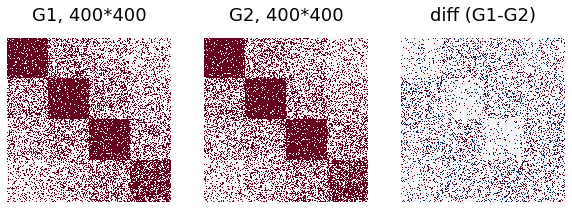

In [6]:
fig, axs = plt.subplots(1,3, figsize=(10, 10))
heatmap(A1, ax=axs[0], cbar=False, title = 'G1, 400*400')
heatmap(A2, ax=axs[1], cbar=False, title = 'G2, 400*400')
heatmap(A1-A2, ax=axs[2], cbar=False, title = 'diff (G1-G2)')

In [7]:
a=A1

In [8]:
for j in range(4):
    for i in range(25):
        a=np.delete(a,75*(j+1)-1,0)
    for i in range(25):
        a=np.delete(a,75*(j+1)-1,1)
a.shape

(300, 300)

In [9]:
pad=np.zeros((400,400))
for i in range(75):
    for j in range(75):
        pad[i][j]=a[i][j]
    for j in range(100,175):
        pad[i][j]=a[i][j-25]
    for j in range(200,275):
        pad[i][j]=a[i][j-50]
    for j in range(300,375):
        pad[i][j]=a[i][j-75]
for i in range(100,175):
    for j in range(75):
        pad[i][j]=a[i-25][j]
    for j in range(100,175):
        pad[i][j]=a[i-25][j-25]
    for j in range(200,275):
        pad[i][j]=a[i-25][j-50]
    for j in range(300,375):
        pad[i][j]=a[i-25][j-75]
for i in range(200,275):
    for j in range(75):
        pad[i][j]=a[i-50][j]
    for j in range(100,175):
        pad[i][j]=a[i-50][j-25]
    for j in range(200,275):
        pad[i][j]=a[i-50][j-50]
    for j in range(300,375):
        pad[i][j]=a[i-50][j-75]
for i in range(300,375):
    for j in range(75):
        pad[i][j]=a[i-75][j]
    for j in range(100,175):
        pad[i][j]=a[i-75][j-25]
    for j in range(200,275):
        pad[i][j]=a[i-75][j-50]
    for j in range(300,375):
        pad[i][j]=a[i-75][j-75]


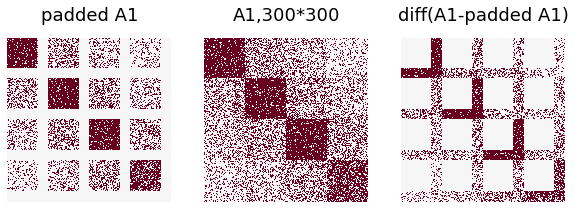

In [11]:
fig, axs = plt.subplots(1,3, figsize=(10, 10))
heatmap(pad, ax=axs[0], cbar=False,title = 'padded A1')
heatmap(a, ax=axs[1], cbar=False,title = 'A1,300*300')
heatmap(A1-pad, ax=axs[2], cbar=False,title = 'diff(A1-padded A1)')

In [166]:
naive,_=naive_padding(a,A2)

In [167]:
adopted,_=adopted_padding(a,A2)

In [177]:
# for naive padding
import random
n=400

node_shuffle_input = np.random.permutation(n)
c = naive[np.ix_(node_shuffle_input, node_shuffle_input)]
node_unshuffle_input = np.array(range(n))
node_unshuffle_input[node_shuffle_input] = np.array(range(n))

W1 = np.sort(random.sample(list(range(n)),3))
W1 = W1.astype(int)
W2 = np.array(node_unshuffle_input[W1])
node_unshuffle_input[node_shuffle_input] = np.array(range(n))

sgm = GMP(n_init = 50, init_method = "rand")
sgm = sgm.fit(A2,c,W1,W2)
d0_naive = c[np.ix_(sgm.perm_inds_, sgm.perm_inds_)]
match_ratio_nav = 1 - (np.count_nonzero(abs(sgm_adp.perm_inds_ - node_unshuffle_input)) / n)

In [175]:
# for adopted padding
import random
n=400

node_shuffle_input = np.random.permutation(n)
c = adopted[np.ix_(node_shuffle_input, node_shuffle_input)]
node_unshuffle_input = np.array(range(n))
node_unshuffle_input[node_shuffle_input] = np.array(range(n))

W1 = np.sort(random.sample(list(range(n)),3))
W1 = W1.astype(int)
W2 = np.array(node_unshuffle_input[W1])
node_unshuffle_input[node_shuffle_input] = np.array(range(n))

sgm_adp = GMP(n_init = 50, init_method = "rand")
sgm_adp = sgm_adp.fit(A1,c,W1,W2)
d0_adopted = c[np.ix_(sgm_adp.perm_inds_, sgm_adp.perm_inds_)]
match_ratio_adp = 1 - (np.count_nonzero(abs(sgm_adp.perm_inds_ - node_unshuffle_input)) / n)

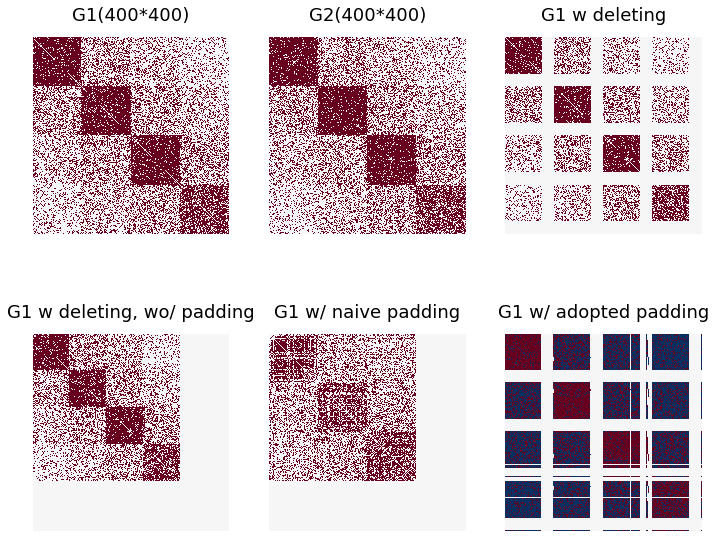

In [180]:
fig, axs = plt.subplots(2,3, figsize=(12, 10))
heatmap(A1, ax=axs[0][0], cbar=False, title="G1(400*400)")
heatmap(A2, ax=axs[0][1], cbar=False, title="G2(400*400)")
heatmap(pad, ax=axs[0][2], cbar=False, title="G1 w deleting")
heatmap(b, ax=axs[1][0], cbar=False, title="G1 w deleting, wo/ padding")
heatmap(d0_naive, ax=axs[1][1], cbar=False, title="G1 w/ naive padding")
heatmap(d0_adopted, ax=axs[1][2], cbar=False, title="G1 w/ adopted padding")

### reproduce figure 4 from the seed graph matching paper